In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

In [2]:
df = pd.read_csv("/kaggle/input/brain-tumor-dataset/brain_tumor_dataset.csv")

# Columns Information

## Patient Information
- **Patient_ID**: Unique identifier for each patient.  
- **Age**: Age of the patient (in years).  
- **Gender**: Gender of the patient (**Male/Female**).  
- **Family_History**: Whether the patient has a family history of brain tumors (**Yes/No**).  

## Tumor Characteristics
- **Tumor_Type**: Type of tumor (**Benign/Malignant**).  
- **Tumor_Size**: Size of the tumor (in centimeters).  
- **Location**: The part of the brain where the tumor is located (e.g., **Frontal, Temporal**).  
- **Histology**: The histological type of the tumor (e.g., **Astrocytoma, Glioblastoma**).  
- **Stage**: The stage of the tumor (**I, II, III, IV**).  
- **Tumor_Growth_Rate**: The growth rate of the tumor (cm per month).  

## Symptoms
- **Symptom_1**: The first symptom observed (e.g., **Headache, Seizures**).  
- **Symptom_2**: The second symptom observed.  
- **Symptom_3**: The third symptom observed.  

## Diagnosis & Treatment
- **MRI_Result**: The result of the MRI scan (**Positive/Negative**).  
- **Radiation_Treatment**: Whether radiation treatment was administered (**Yes/No**).  
- **Surgery_Performed**: Whether surgery was performed (**Yes/No**).  
- **Chemotherapy**: Whether chemotherapy was administered (**Yes/No**).  

## Follow-Up & Prognosis
- **Survival_Rate**: The estimated survival rate of the patient (percentage).  
- **Follow_Up_Required**: Whether follow-up is required (**Yes/No**).  
- **Treatment_Response**: The response to the treatment (**Improved/Worsened/Stable**).  


# Data Cleaning

In [3]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

Wow, apparently we are in front of a super dataset that is complete, that's great!

In [4]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

In [5]:
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


I will use One-Hot Encodign for tumor location, histology and symptoms.

I will use label encoding for gender, tumor type, stage, treatment, surgery etc., family history, MRI results and follow-up.

all this in order to be able to better manipulate this data and to be able to perform the data exploration and training of our model in a better way.

In [6]:
df = df.drop(columns=['Patient_ID'])

In [7]:
binary_mapping = {
    'Male': 1, 'Female': 0, 
    'Malignant': 1, 'Benign': 0,
    'Yes': 1, 'No': 0,
    'Positive': 1, 'Negative': 0
}

binary_cols = [
    'Gender', 'Tumor_Type', 'Radiation_Treatment', 'Surgery_Performed', 
    'Chemotherapy', 'Family_History', 'MRI_Result', 'Follow_Up_Required'    
]

df[binary_cols] = df[binary_cols].applymap(lambda x: binary_mapping[x])

In [8]:
stage_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
df['Stage'] = df['Stage'].map(stage_mapping)

In [9]:
df = pd.get_dummies(df, columns=['Location', 'Histology', 'Symptom_1', 'Symptom_2', 'Symptom_3'], drop_first=True)

In [10]:
df.head()

,Age,Gender,Tumor_Type,Tumor_Size,Stage,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,Histology_Medulloblastoma,Histology_Meningioma,Symptom_1_Nausea,Symptom_1_Seizures,Symptom_1_Vision Issues,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues
0,73,1,1,5.375612,3,0,0,0,51.312579,0.111876,0,1,1,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False
1,26,1,0,4.847098,2,1,1,1,46.373273,2.165736,1,1,1,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False
2,31,1,0,5.588391,1,0,0,0,47.072221,1.884228,0,0,0,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False
3,29,1,1,1.436600,4,1,0,1,51.853634,1.283342,1,0,0,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False
4,54,0,0,2.417506,1,0,0,1,54.708987,2.069477,0,1,1,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False


In [11]:
df.columns

Index(['Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Stage', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result', 'Follow_Up_Required', 'Location_Occipital', 'Location_Parietal', 'Location_Temporal', 'Histology_Glioblastoma', 'Histology_Medulloblastoma', 'Histology_Meningioma', 'Symptom_1_Nausea', 'Symptom_1_Seizures', 'Symptom_1_Vision Issues', 'Symptom_2_Nausea', 'Symptom_2_Seizures', 'Symptom_2_Vision Issues', 'Symptom_3_Nausea', 'Symptom_3_Seizures', 'Symptom_3_Vision Issues'], dtype='object')

In [12]:
df = df.rename(columns={'Symptom_1_Vision Issues': 'Symptom_1_Vision_Issues', 
                   'Symptom_2_Vision Issues': 'Symptom_2_Vision_Issues',
                   'Symptom_3_Vision Issues': 'Symptom_3_Vision_Issues'
                  })

# Exploratory Data Analysis

## Survival Rate?

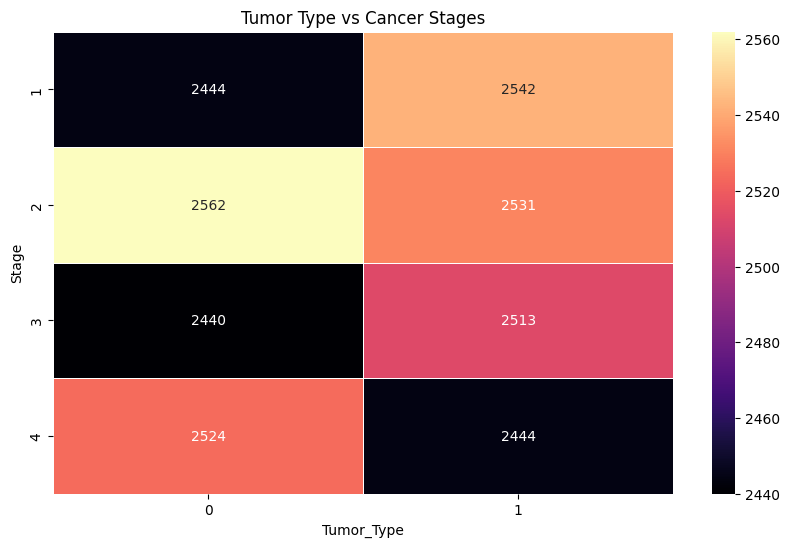

In [13]:
plt.figure(figsize=(10, 6))
tumor_stage_pivot = df.pivot_table(index="Stage", columns="Tumor_Type", aggfunc="size", fill_value=0)
sns.heatmap(tumor_stage_pivot, cmap="magma", annot=True, fmt="d", linewidths=0.5)
plt.title("Tumor Type vs Cancer Stages")
plt.show()

We can see how the largest amount of data is from benign stage 2 cancers.

I find it curious that, although not as pronounced, it is a present pattern, showing how the majority of malignant cases are in stage 1 and decrease as the cancer progresses.

This can be interpreted as the survival rate of malignant cancer patients, where they are detected early (probably due to more pronounced symptoms) compared to benign cancers, which are mostly discovered in stage 2. As malignant cancer progresses, patients have a lower chance of survival and therefore not as many reach stage 4 as in the case of benign tumors, where the second highest concentration of data is in stage 4.

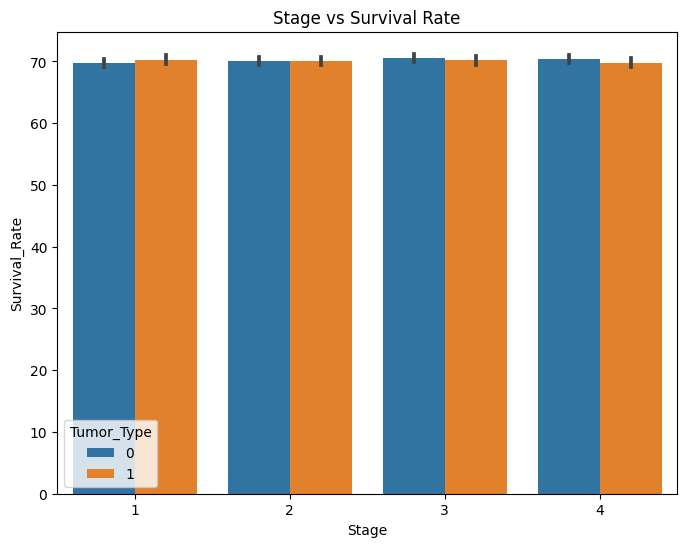

In [14]:
plt.figure(figsize=(8,6))

sns.barplot(
    data=df, 
    x="Stage", 
    y="Survival_Rate", 
    hue="Tumor_Type", 
)
plt.title('Stage vs Survival Rate')
plt.show()

This reinforces our hypothesis, where we see that the survival rate of people suffering from a malignant tumor are less likely to survive as the stages progress.

## How does cancer affect each gender?

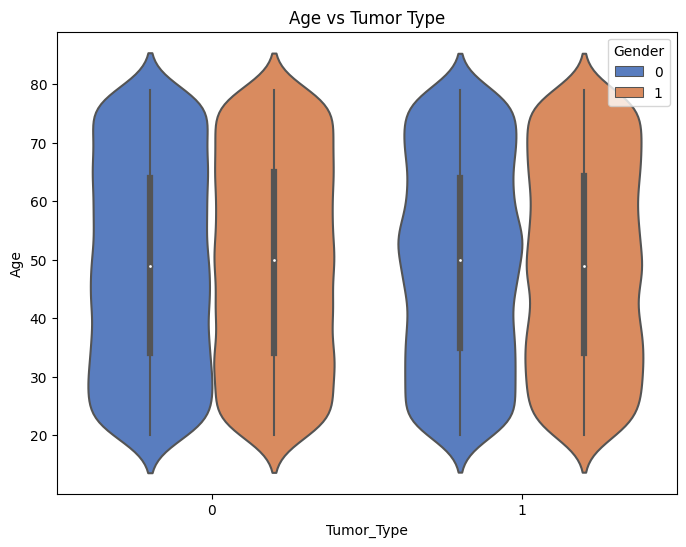

In [15]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="Tumor_Type", y="Age", hue='Gender', palette="muted")
plt.title("Age vs Tumor Type")
plt.show()

We can see that cancer does not differ by age, but we can notice a little more density in malignant cancers around the age of 50.

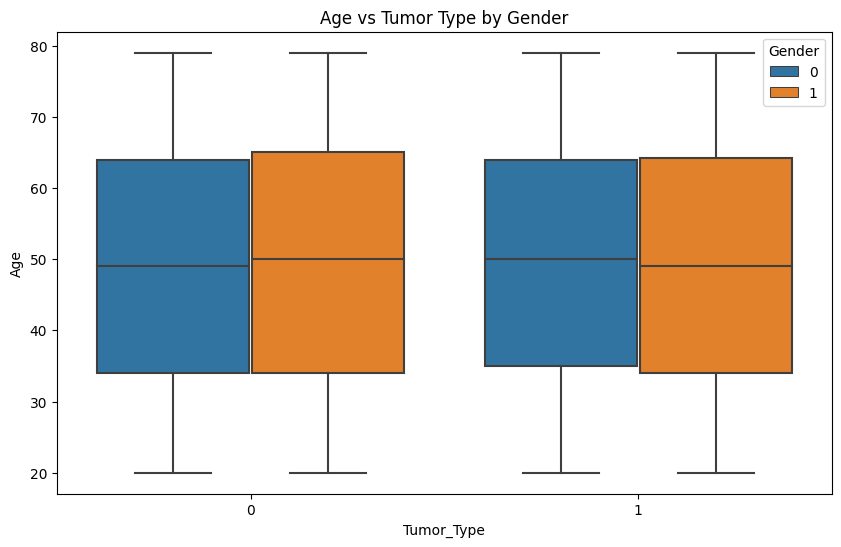

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tumor_Type',
           y='Age',
           hue='Gender',
           data=df)
plt.title('Age vs Tumor Type by Gender')
plt.show()

From this graph we can identify the age range in which cancer is most likely to occur, for both genders the age range is between 35 years and 65 years, with the most likely age being around 50.

We can also see that men are slightly more likely to suffer from benign cancer after the age of 65 than women, and women are less likely to suffer from malignant cancer at a younger age than men.

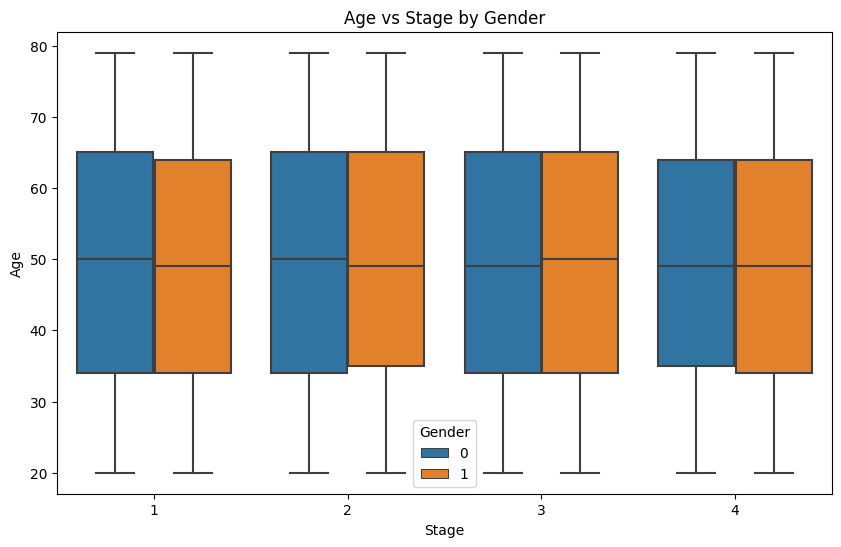

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage',
           y='Age',
           hue='Gender',
           data=df)
plt.title('Age vs Stage by Gender')
plt.show()

In this graph we can see that there are more women suffering from stage 1 or 2 cancer and more men in stage 4, for stage 3 they are level.

We can also identify that women in stage 1 and 2 tend to be a little older than men and for stage 3 a little younger, unlike stage 4 where most share the same age.

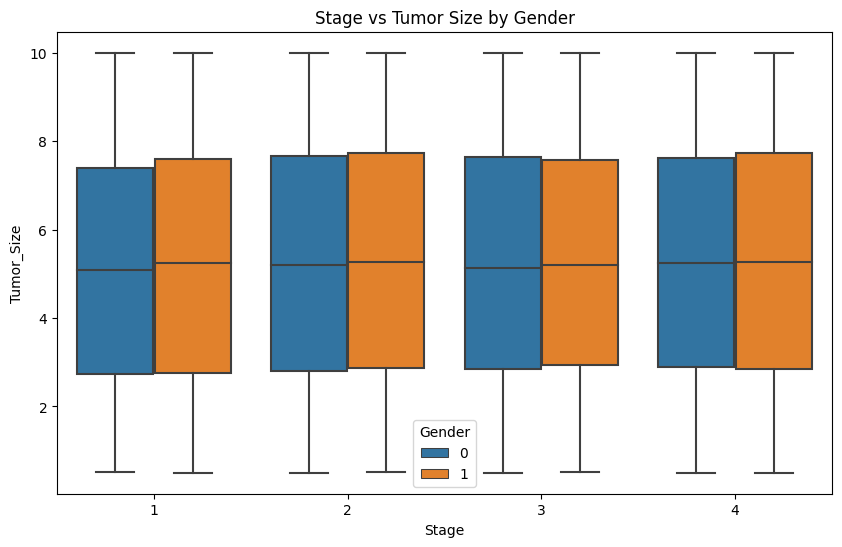

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage',
           y='Tumor_Size',
           hue='Gender',
           data=df)
plt.title('Stage vs Tumor Size by Gender')
plt.show()

In this graph we can see how the size of the tumors increases as the stages of cancer progress.

We can also see how the tumor in men tends to be larger than in women.

We can also see that the size of the tumors are around 2.5 and 6.8 centimeters on average.

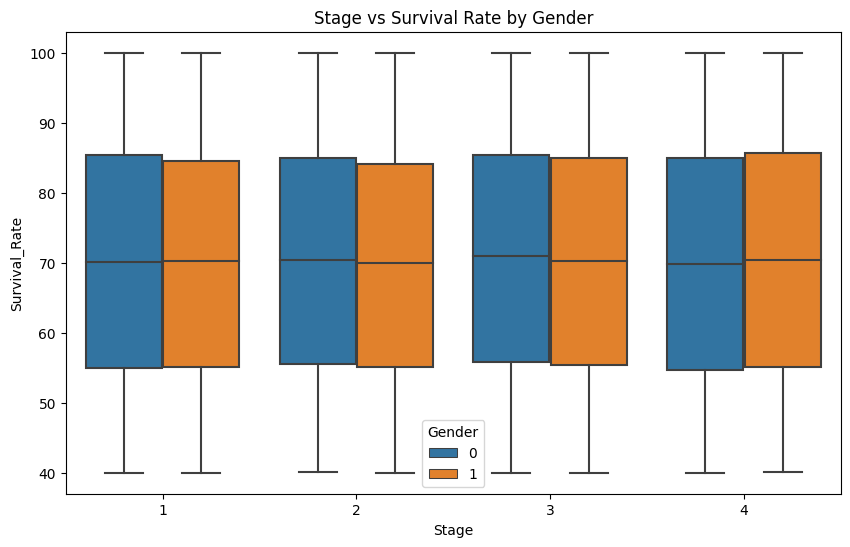

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage',
           y='Survival_Rate',
           hue='Gender',
           data=df)
plt.title('Stage vs Survival Rate by Gender')
plt.show()

In this graph we can see how women tend to have a higher probability of surviving cancer, and we can also say that the probability of survival is between 55 and 88 percent.

## What is the best treatment for cancer?

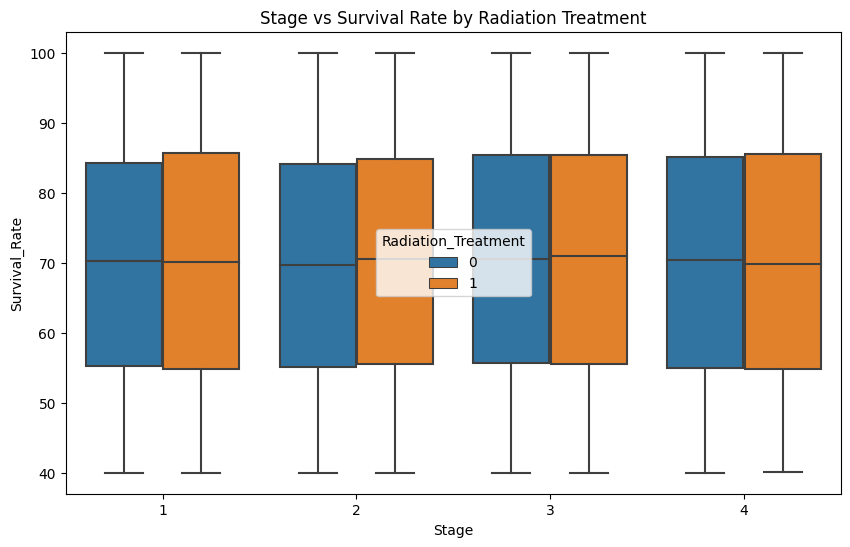

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage',
           y='Survival_Rate',
           hue='Radiation_Treatment',
           data=df)
plt.title('Stage vs Survival Rate by Radiation Treatment')
plt.show()

In this graph we can see how people who underwent radiation treatment are more likely to survive the cancer, we can also see that in stage 1 it is more effective and its effectiveness decreases as the cancer progresses.

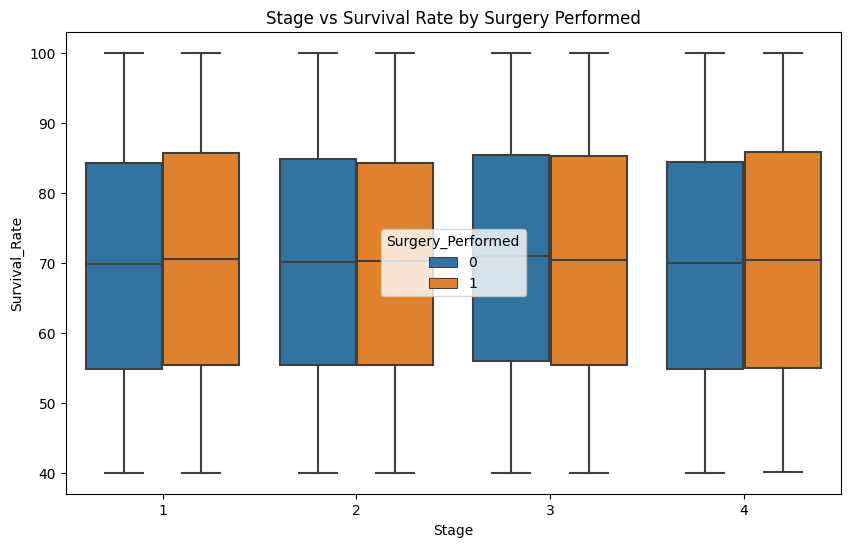

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage',
           y='Survival_Rate',
           hue='Surgery_Performed',
           data=df)
plt.title('Stage vs Survival Rate by Surgery Performed')
plt.show()

In this graph we can see how people who underwent stage 1 surgery were more likely to survive the cancer, while people in stage 2 and 3 were less likely to survive than people who did not undergo surgery, however, for stage 4 it was quite effective.

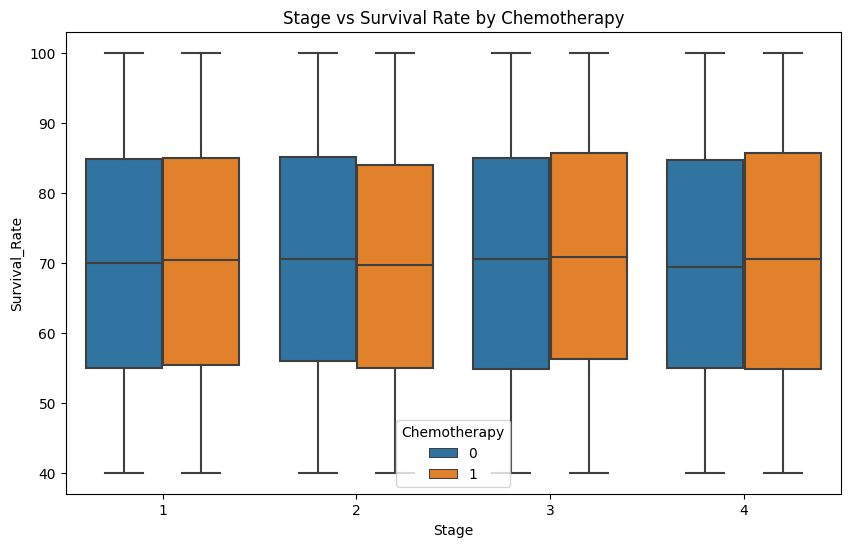

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage',
           y='Survival_Rate',
           hue='Chemotherapy',
           data=df)
plt.title('Stage vs Survival Rate by Chemotherapy')
plt.show()

Here we can see how chemotherapy is not as effective in almost any stage of cancer, except in stages 3 and 4, but nothing surprising.

According to what we could see in these graphs, when the cancer is in stage 1 any type of treatment is effective, but things change when we move on to stage 1, where for stages 2 and 3 surgery is less effective and radiotherapy a little more stable but without much effect in these stages, chemotherapy showed results in stage 3, now, when we talk about stage 4 the best option is surgery where the probability of survival shoots up compared to people who had radiotherapy or simply did not get treated.

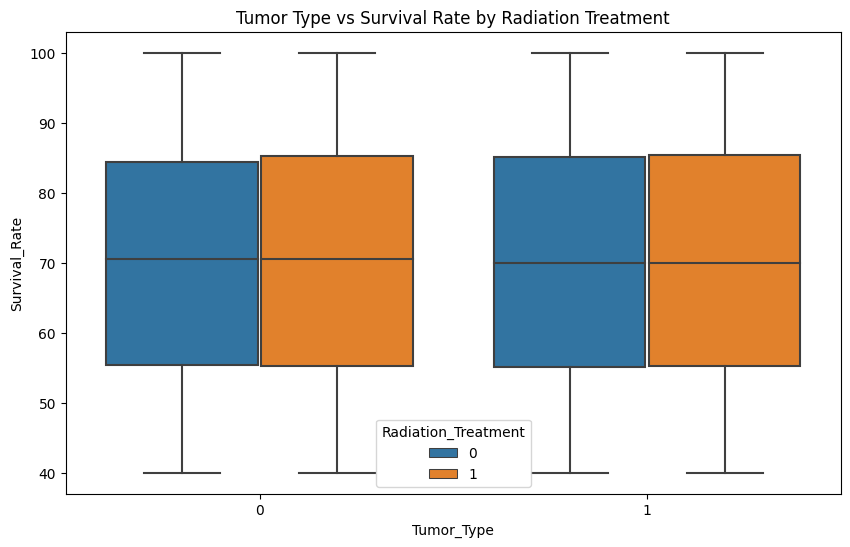

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tumor_Type',
           y='Survival_Rate',
           hue='Radiation_Treatment',
           data=df)
plt.title('Tumor Type vs Survival Rate by Radiation Treatment')
plt.show()

With this graph, we can see how radiation treatment works for both malignant and benign tumors.

We can see how treatment for benign tumors is more effective than for malignant tumors, but it is still effective for both, just to a lesser extent for malignant tumors.

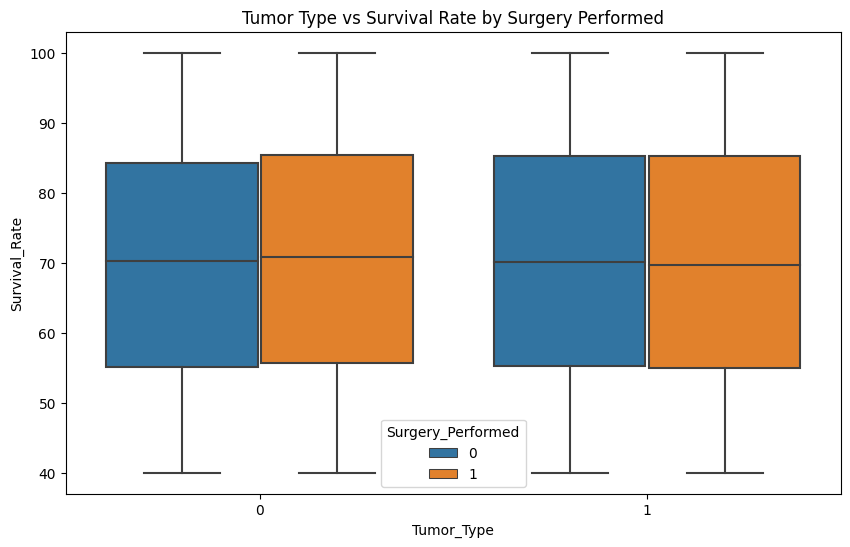

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tumor_Type',
           y='Survival_Rate',
           hue='Surgery_Performed',
           data=df)
plt.title('Tumor Type vs Survival Rate by Surgery Performed')
plt.show()

With this graph, we can see how surgery works against cancer and how it is more effective for benign tumors than for malignant ones. However, for malignant tumors it does not seem to have as much effect. As we saw in the previous graph, it seems to only have a positive effect, mostly in stages 1 and 4 of cancer.

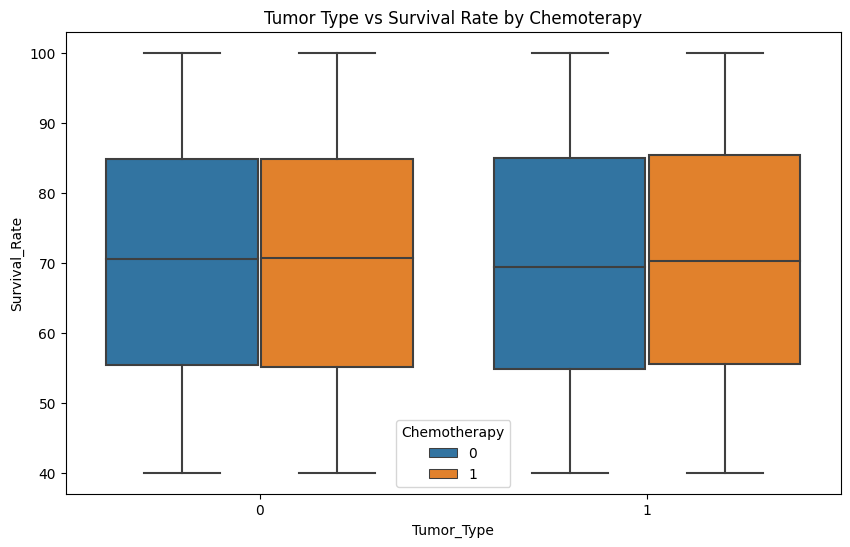

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tumor_Type',
           y='Survival_Rate',
           hue='Chemotherapy',
           data=df)
plt.title('Tumor Type vs Survival Rate by Chemoterapy')
plt.show()

Very similar results for people who underwent chemotherapy and those who did not

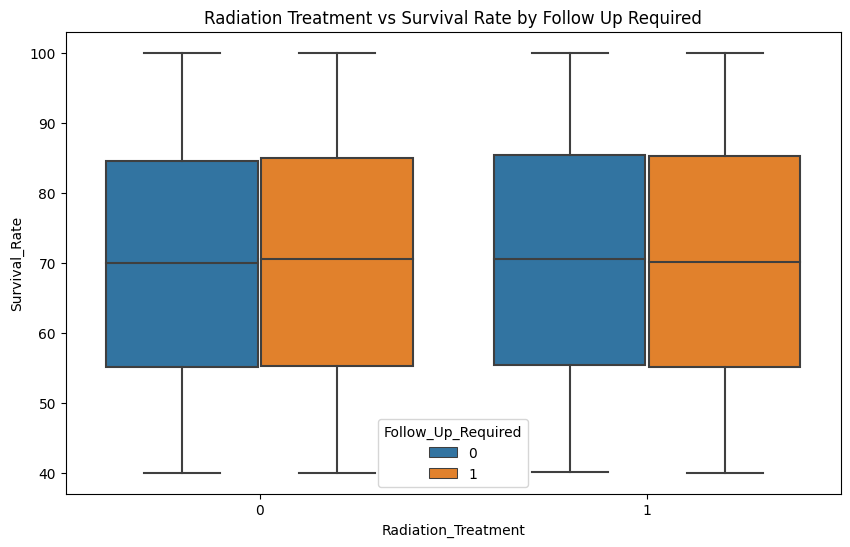

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Radiation_Treatment',
           y='Survival_Rate',
           hue='Follow_Up_Required',
           data=df)
plt.title('Radiation Treatment vs Survival Rate by Follow Up Required')
plt.show()

In this graph, we can see how people who did not undergo radiation treatment and are not receiving follow-up care are less likely to survive than those who are. On the other hand, those who underwent radiation treatment and are not receiving follow-up care are more likely to survive than those who did not receive treatment and are not receiving follow-up care.

On the other hand, in this case, there is no notable difference in the probability of survival between those who underwent treatment and are not receiving follow-up care and those who are receiving follow-up care.

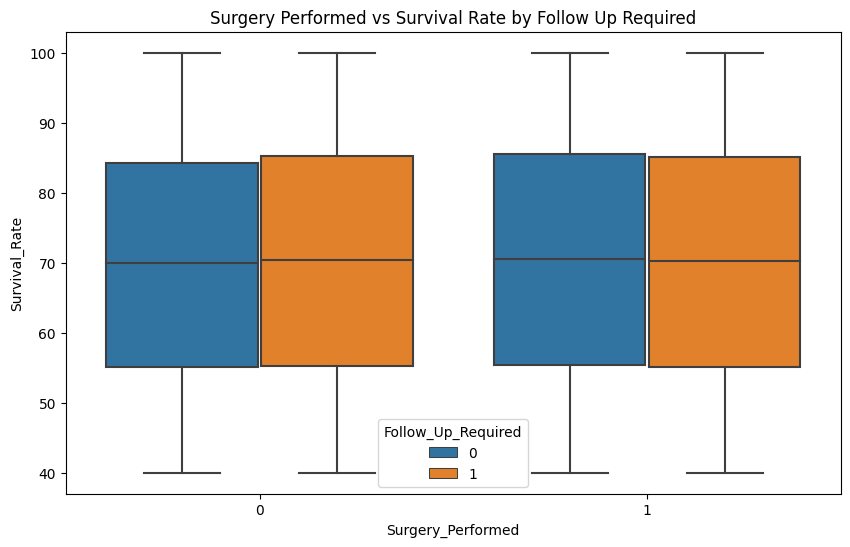

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Surgery_Performed',
           y='Survival_Rate',
           hue='Follow_Up_Required',
           data=df)
plt.title('Surgery Performed vs Survival Rate by Follow Up Required')
plt.show()

In this graph we can see that people who did not undergo surgery and are being monitored are more likely to survive than those who did not. On the other hand, people who did undergo surgery and are not being monitored are much more likely to survive than people who did not undergo surgery and are not being monitored.

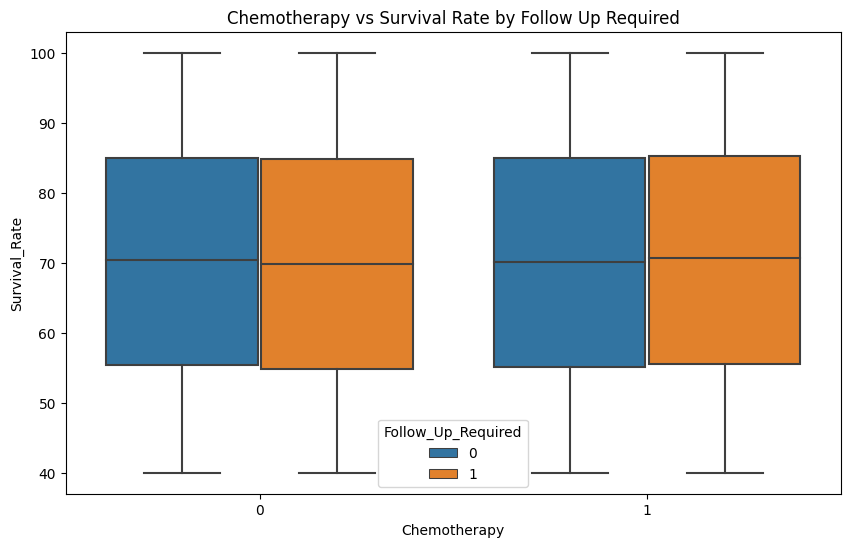

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Chemotherapy',
           y='Survival_Rate',
           hue='Follow_Up_Required',
           data=df)
plt.title('Chemotherapy vs Survival Rate by Follow Up Required')
plt.show()

Chemotherapy is definitely the least effective of all, but it maintains stability.

## Correlations?

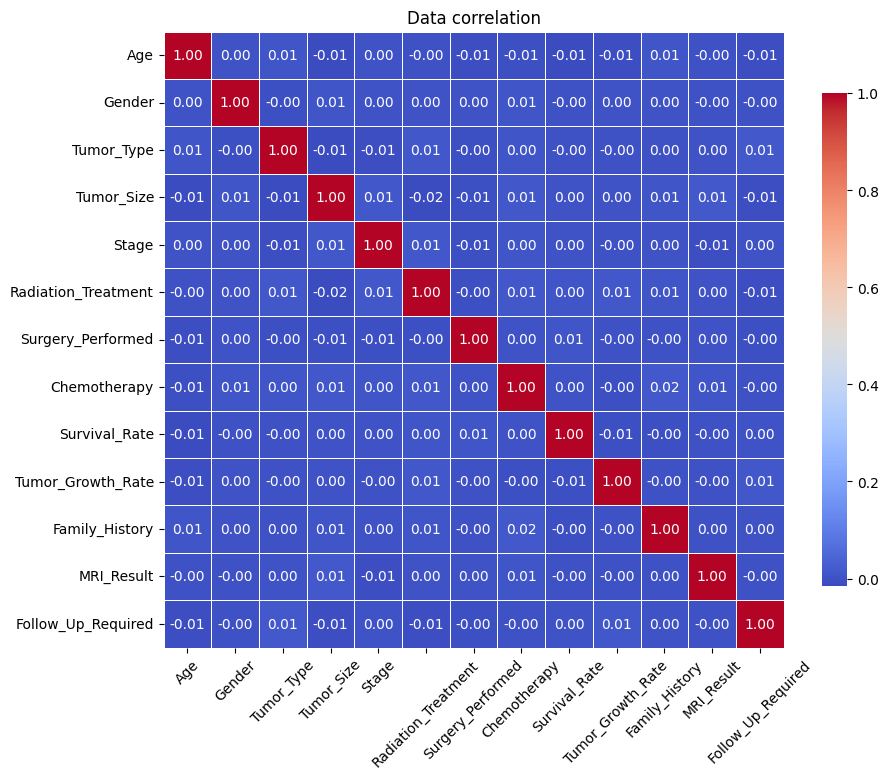

In [29]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,  
    fmt=".2f",  
    linewidths=0.5,  
    cmap="coolwarm", 
    annot_kws={"size": 10}, 
    cbar_kws={'shrink': 0.8} 
)

plt.xticks(rotation=45) 
plt.yticks(rotation=0)  

plt.title("Data correlation")

plt.show()

<Figure size 1000x600 with 0 Axes>

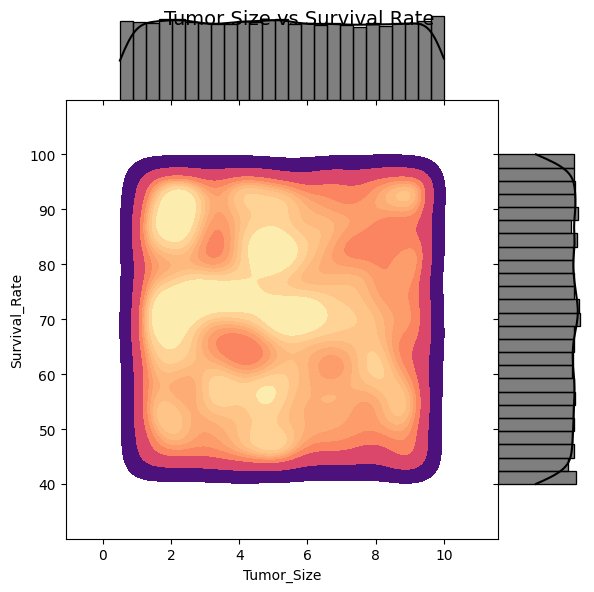

In [30]:
plt.figure(figsize=(10, 6))
g = sns.JointGrid(data=df, x="Tumor_Size", y="Survival_Rate", space=0)
g.plot_joint(sns.kdeplot, fill=True, cmap="magma", thresh=0.1, levels=10)
g.plot_marginals(sns.histplot, kde=True, bins=25, color="black")
plt.suptitle("Tumor Size vs Survival Rate", fontsize=14)
plt.show()

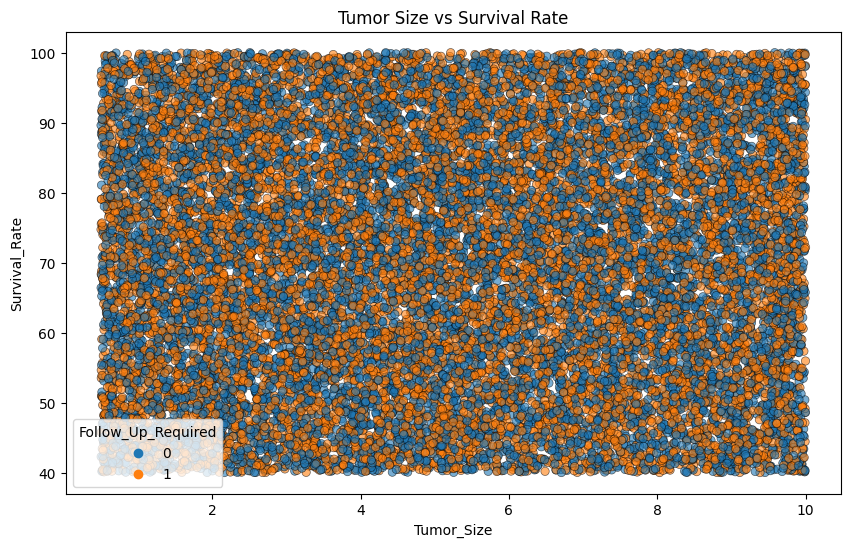

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Tumor_Size", y="Survival_Rate", hue='Follow_Up_Required', alpha=0.6, edgecolor="black")
plt.title("Tumor Size vs Survival Rate")
plt.show()

We cannot identify strong correlations, the few that exist follow the patterns we identified earlier.

I doubt that any of the variables really have a strong correlation with another. I don't know if this is the case in real life or because of this specific data set, but I'm surprised by how little the variables are related, and the relationship that exists isn't that noticeable in any case...

## Symptoms distribution?

In [32]:
nausea_symptom = df[['Symptom_1_Nausea','Symptom_2_Nausea','Symptom_3_Nausea']]
seizure_symptom = df[['Symptom_1_Seizures','Symptom_2_Seizures','Symptom_3_Seizures']]
vision_issue_symptom = df[['Symptom_1_Vision_Issues','Symptom_2_Vision_Issues','Symptom_3_Vision_Issues']]

In [33]:
symptom_counts = {
    "Nausea": nausea_symptom.sum().sum(),
    "Seizures": seizure_symptom.sum().sum(),
    "Vision Issues": vision_issue_symptom.sum().sum()
}
symptom_counts

{'Nausea': 14912, 'Seizures': 15109, 'Vision Issues': 14984}

In [34]:
symptom_df = pd.DataFrame(list(symptom_counts.items()), columns=["Symptom", "Count"])
symptom_df

,Symptom,Count
0,Nausea,14912
1,Seizures,15109
2,Vision Issues,14984


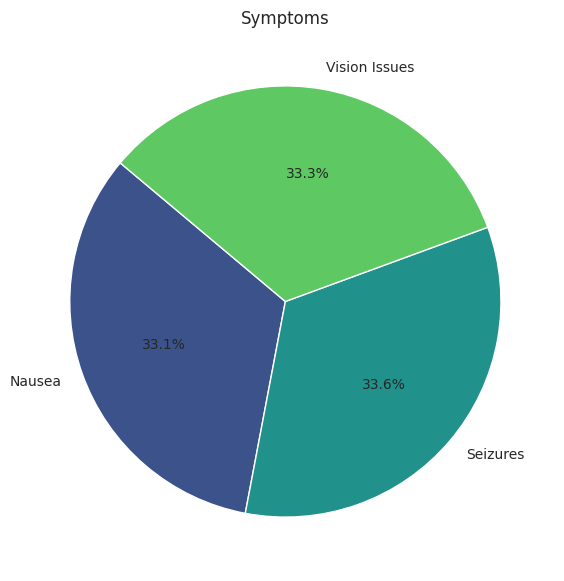

In [35]:
sns.set_style("whitegrid")

plt.figure(figsize=(7, 7))
colors = sns.color_palette("viridis", len(symptom_counts))  
plt.pie(symptom_counts.values(), labels=symptom_counts.keys(), autopct="%1.1f%%", colors=colors, startangle=140)
plt.title('Symptoms')
plt.show()

Here we can see how the most common symptom is Seizures (although not very markedly)

## Location distribution?

In [36]:
locations = df[['Location_Occipital', 'Location_Parietal', 'Location_Temporal']]

In [37]:
location_counts = {
    'Occipital': locations['Location_Occipital'].sum(),
    'Parietal': locations['Location_Parietal'].sum(),
    'Temporal': locations['Location_Temporal'].sum()
}
location_counts

{'Occipital': 4967, 'Parietal': 4990, 'Temporal': 5118}

In [38]:
location_df = pd.DataFrame(list(location_counts.items()), columns=["Location", "Count"])
location_df

,Location,Count
0,Occipital,4967
1,Parietal,4990
2,Temporal,5118


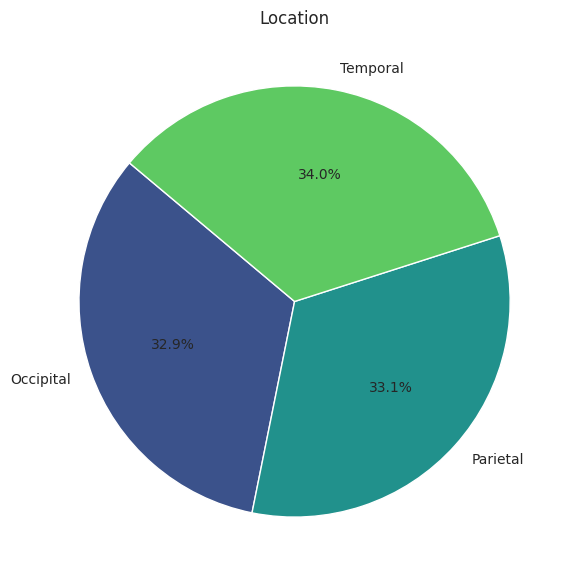

In [39]:
sns.set_style("whitegrid")

plt.figure(figsize=(7, 7))
colors = sns.color_palette("viridis", len(location_df))  
plt.pie(location_df['Count'].values, labels=location_df['Location'].values, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title('Location')
plt.show()

We see that the most common is the Temporal and the least common is the Occipital

## Histology distribution?

In [40]:
histology = df[['Histology_Glioblastoma', 'Histology_Medulloblastoma', 'Histology_Meningioma']]

In [41]:
histology_counts = {
    'Glioblastoma': histology['Histology_Glioblastoma'].sum(),
    'Medulloblastoma': histology['Histology_Medulloblastoma'].sum(),
    'Meningioma': histology['Histology_Meningioma'].sum()
}
histology_counts

{'Glioblastoma': 5068, 'Medulloblastoma': 4979, 'Meningioma': 5016}

In [42]:
histology_df = pd.DataFrame(list(histology_counts.items()), columns=["Histology", "Count"])
histology_df

,Histology,Count
0,Glioblastoma,5068
1,Medulloblastoma,4979
2,Meningioma,5016


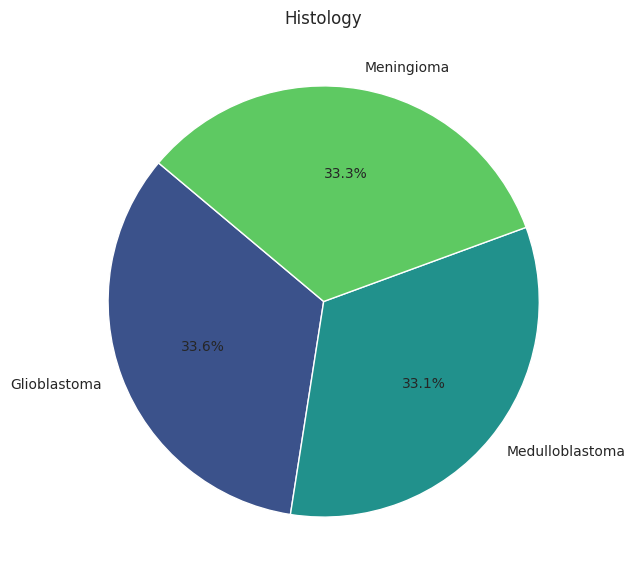

In [43]:
sns.set_style("whitegrid")

plt.figure(figsize=(7, 7))
colors = sns.color_palette("viridis", len(location_df))  
plt.pie(histology_df['Count'].values, labels=histology_df['Histology'].values, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title('Histology')
plt.show()

# Machine Learning Models

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [45]:
X = df.drop('Tumor_Type', axis=1)
y = df['Tumor_Type']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) 

## Logistic regression model

In [47]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42))
])

In [48]:
pipeline_lr.fit(X_train, y_train)
pred_lr = pipeline_lr.predict(X_test)

In [49]:
report_dict = classification_report(y_test, pred_lr, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()
df_report

,precision,recall,f1-score,support
0,0.497802,0.511033,0.504331,1994.00000
1,0.500768,0.487537,0.494064,2006.00000
accuracy,0.499250,0.499250,0.499250,0.49925
macro avg,0.499285,0.499285,0.499197,4000.00000
weighted avg,0.499289,0.499250,0.499182,4000.00000


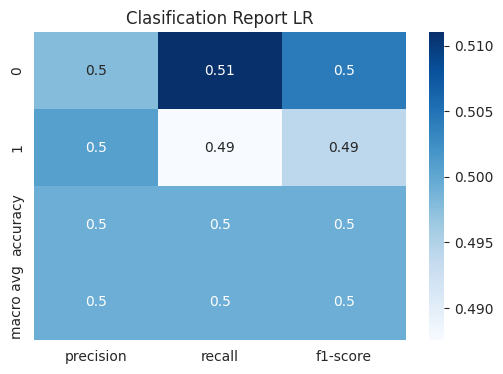

In [50]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')  
plt.title("Clasification Report LR")
plt.show()

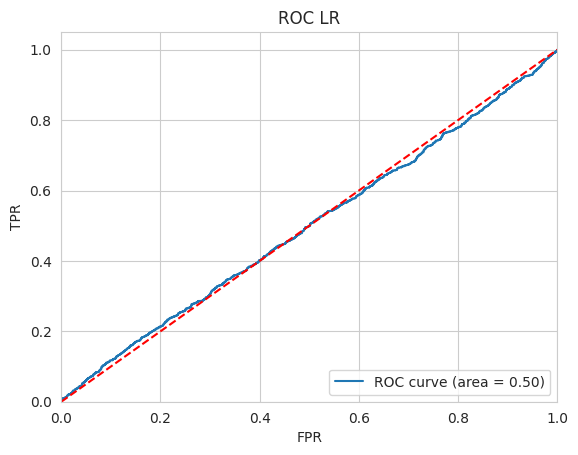

In [51]:
y_pred_prob = pipeline_lr.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC LR')
plt.legend(loc="lower right")
plt.show()


## Random Forest Model

In [52]:
pipeline_rf = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

In [53]:
pipeline_rf.fit(X_train, y_train)
pred_rf = pipeline_rf.predict(X_test)

In [54]:
report_dict = classification_report(y_test, pred_rf, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()
df_report

,precision,recall,f1-score,support
0,0.506121,0.539117,0.522098,1994.000
1,0.510128,0.477069,0.493045,2006.000
accuracy,0.508000,0.508000,0.508000,0.508
macro avg,0.508124,0.508093,0.507571,4000.000
weighted avg,0.508130,0.508000,0.507528,4000.000


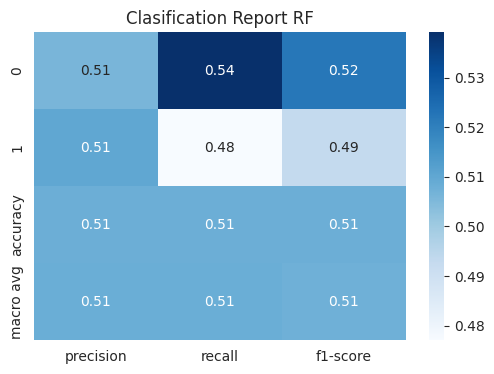

In [55]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')  
plt.title("Clasification Report RF")
plt.show()

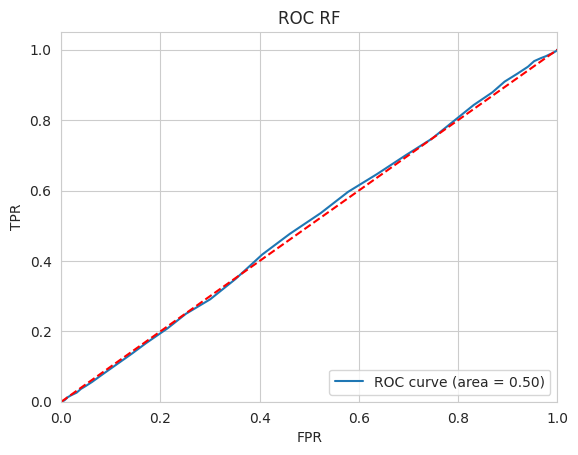

In [56]:
y_pred_prob = pipeline_rf.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC RF')
plt.legend(loc="lower right")
plt.show()

## Comparation

In [57]:
cv_scores_lr = cross_val_score(pipeline_lr, X, y, cv=20)
cv_scores_rf = cross_val_score(pipeline_rf, X, y, cv=20)

print("Cross-validation scores - LR:", cv_scores_lr)
print("Media:", cv_scores_lr.mean())
print("Cross-validation scores - RF:", cv_scores_rf)
print("Media:", cv_scores_rf.mean())

Cross-validation scores - LR: [0.487 0.496 0.479 0.507 0.535 0.494 0.503 0.489 0.51  0.499 0.522 0.503
 0.507 0.532 0.507 0.498 0.487 0.491 0.48  0.48 ]
Media: 0.5003
Cross-validation scores - RF: [0.507 0.48  0.498 0.512 0.5   0.514 0.499 0.538 0.485 0.516 0.508 0.5
 0.484 0.485 0.502 0.478 0.482 0.463 0.489 0.484]
Media: 0.4962


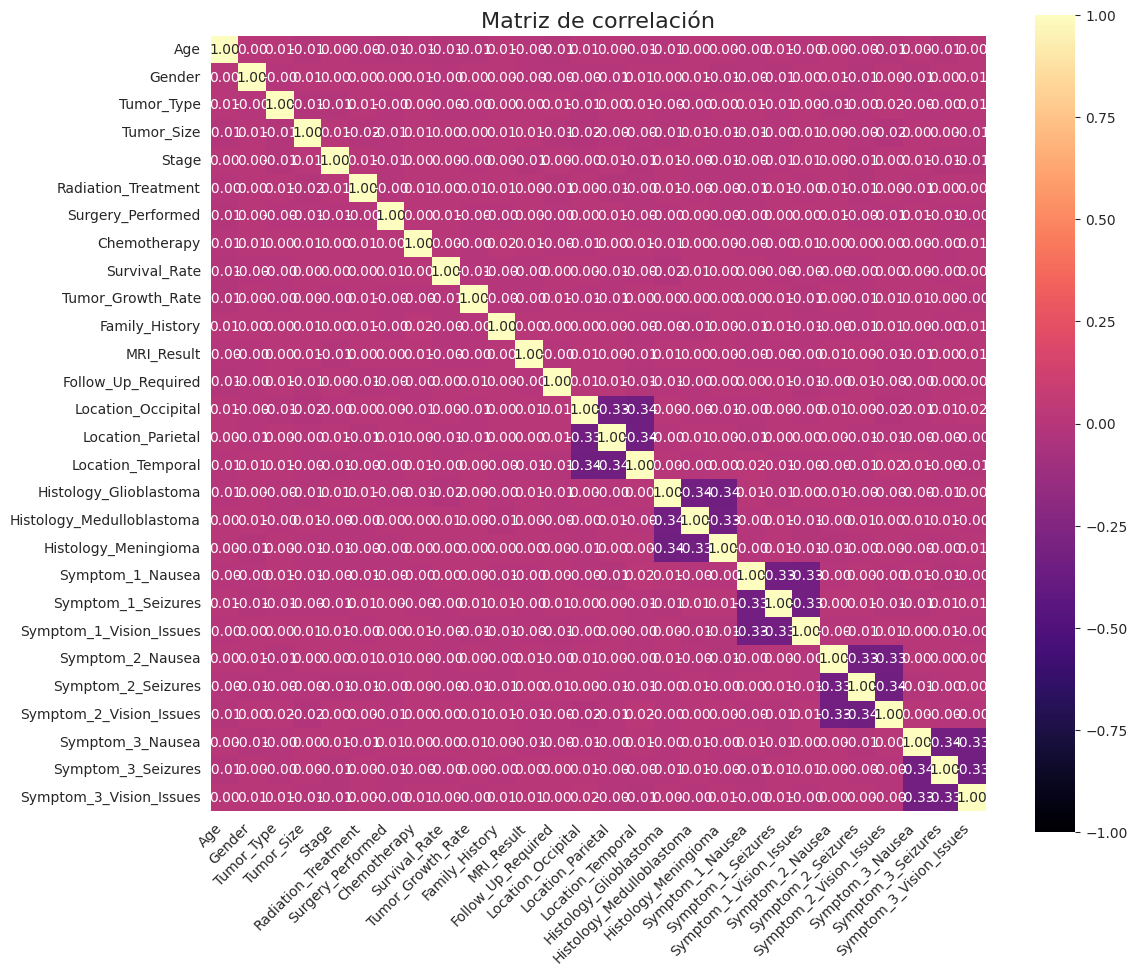

In [58]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))  

sns.heatmap(
    corr_matrix, 
    annot=True,      
    fmt=".2f",       
    cmap='magma',    
    vmin=-1, vmax=1, 
    square=True       
)

plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.title("Matriz de correlación", fontsize=16)
plt.tight_layout()                  
plt.show()


# Conclusions



Although the dataset appeared to be a promising source, both the exploratory analysis and the model performance indicated that the signals between the variables were very weak. The main findings are summarized below:

- **Weak signals and correlations:**
The exploratory analysis revealed that the correlations between the different variables and the target variable (benign vs. malignant tumor) were minimal. The balanced distribution (approximately 50-50) of these variables limits the ability to differentiate between the two classes.

- **Model performance:**
The implemented models (e.g., Logistic Regression and Random Forest) yielded results close to 50% accuracy, suggesting that they were unable to detect significant patterns or relationships between the variables. Essentially, their performance resembles random predictions.

- **Potential limitations:**
It is likely that the conditions for determining whether a tumor is benign or malignant depend on additional variables not included in this dataset or on more complex relationships that cannot be captured with current models and techniques.

**In conclusion,** although the dataset appeared to have potential, the evidence suggests that the information contained is not sufficient to reliably predict the nature of the tumor using the implemented models. For future studies, it is recommended to consider incorporating additional data or exploring advanced methodologies that allow capturing nonlinear interactions between variables.